# Airline Special Prorate Agreement Profitability Analysis 



In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [209]:
spa_data = pd.read_csv("https://raw.githubusercontent.com/rajramanujam/Special-Prorate-Agreement-Performance/main/finspa.csv")

In [210]:
spa_data

,procarnumcod,fromarportcod,toarportcod,spacod,UpliftRestrictions,ThroughSPAflag,MultilateralCarrier,InvoluntaryRerouted,InvoluntaryEndorsed,Indemnification,...,spaoncodeshare,OALsurchargebilling,spashareflag,FRMLAT,FRMLON,TOOLAT,TOOLON,bilamt,bilcnt,outcome
0,211,MNL,TAG,42,Q,E,Q,A,U,A,...,I,U,I,14.508600,121.019997,9.665442,123.853533,1737091.58,45717,5
1,220,HKG,MNL,3,Q,E,Q,A,U,A,...,I,U,I,22.308901,113.915001,14.508600,121.019997,1735964.20,13901,5
2,126,MNL,CGK,14,Q,E,Q,A,U,A,...,I,U,I,14.508600,121.019997,-6.125570,106.655998,1723632.50,9100,5
3,126,CGK,MNL,14,Q,E,Q,A,U,A,...,I,U,I,-6.125570,106.655998,14.508600,121.019997,1715746.00,9061,5
4,1,MCO,LAX,11,Q,E,Q,A,U,A,...,I,U,I,28.429399,-81.308998,33.942501,-118.407997,1679249.97,6007,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,795,PQQ,BNE,1,M,A,M,M,E,M,...,A,U,A,-31.435801,152.863007,-27.384199,153.117004,62.02,1,0
19142,1,ORD,SHV,7,M,A,M,M,E,M,...,A,U,A,41.978600,-87.904800,32.446602,-93.825600,62.03,1,0
19143,5,CHS,EWR,8,M,A,M,M,E,M,...,A,U,A,32.898602,-80.040497,40.692501,-74.168701,62.04,1,0
19144,6,ATL,MDW,8,M,A,M,M,E,M,...,A,U,A,33.636700,-84.428101,41.785999,-87.752403,62.04,1,0


In [115]:
spa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   procarnumcod         19146 non-null  int64  
 1   fromarportcod        19146 non-null  object 
 2   toarportcod          19146 non-null  object 
 3   spacod               19146 non-null  int64  
 4   UpliftRestrictions   19146 non-null  object 
 5   ThroughSPAflag       19146 non-null  object 
 6   MultilateralCarrier  19146 non-null  object 
 7   InvoluntaryRerouted  19146 non-null  object 
 8   InvoluntaryEndorsed  19146 non-null  object 
 9   Indemnification      19146 non-null  object 
 10  sidetrip             19146 non-null  object 
 11  originalreissueflg   19146 non-null  object 
 12  Transportation       19146 non-null  object 
 13  ownSurchargebilling  19146 non-null  object 
 14  mixedclassoptions    19146 non-null  object 
 15  sectorFareComponent  19146 non-null 

In [116]:
spa_data.isnull().sum()

procarnumcod           0
fromarportcod          0
toarportcod            0
spacod                 0
UpliftRestrictions     0
ThroughSPAflag         0
MultilateralCarrier    0
InvoluntaryRerouted    0
InvoluntaryEndorsed    0
Indemnification        0
sidetrip               0
originalreissueflg     0
Transportation         0
ownSurchargebilling    0
mixedclassoptions      0
sectorFareComponent    0
spaoncodeshare         0
OALsurchargebilling    0
spashareflag           0
FRMLAT                 0
FRMLON                 0
TOOLAT                 0
TOOLON                 0
bilamt                 0
bilcnt                 0
outcome                0
dtype: int64

In [117]:
spa_data['procarnumcod']=spa_data['procarnumcod'].astype('category').cat.codes
spa_data['fromarportcod']=spa_data['fromarportcod'].astype('category').cat.codes
spa_data['toarportcod']=spa_data['toarportcod'].astype('category').cat.codes
spa_data['UpliftRestrictions']=spa_data['UpliftRestrictions'].astype('category').cat.codes
spa_data['ThroughSPAflag']=spa_data['ThroughSPAflag'].astype('category').cat.codes
spa_data['MultilateralCarrier']=spa_data['MultilateralCarrier'].astype('category').cat.codes
spa_data['InvoluntaryRerouted']=spa_data['InvoluntaryRerouted'].astype('category').cat.codes
spa_data['InvoluntaryEndorsed']=spa_data['InvoluntaryEndorsed'].astype('category').cat.codes
spa_data['Indemnification']=spa_data['Indemnification'].astype('category').cat.codes
spa_data['sidetrip']=spa_data['sidetrip'].astype('category').cat.codes
spa_data['originalreissueflg']=spa_data['originalreissueflg'].astype('category').cat.codes
spa_data['Transportation']=spa_data['Transportation'].astype('category').cat.codes
spa_data['ownSurchargebilling']=spa_data['ownSurchargebilling'].astype('category').cat.codes
spa_data['mixedclassoptions']=spa_data['mixedclassoptions'].astype('category').cat.codes
spa_data['sectorFareComponent']=spa_data['sectorFareComponent'].astype('category').cat.codes
spa_data['spaoncodeshare']=spa_data['spaoncodeshare'].astype('category').cat.codes
spa_data['OALsurchargebilling']=spa_data['OALsurchargebilling'].astype('category').cat.codes
spa_data['spashareflag']=spa_data['spashareflag'].astype('category').cat.codes



In [118]:
spa_data

,procarnumcod,fromarportcod,toarportcod,spacod,UpliftRestrictions,ThroughSPAflag,MultilateralCarrier,InvoluntaryRerouted,InvoluntaryEndorsed,Indemnification,...,spaoncodeshare,OALsurchargebilling,spashareflag,FRMLAT,FRMLON,TOOLAT,TOOLON,bilamt,bilcnt,outcome
0,36,355,527,42,4,1,4,0,5,0,...,2,5,2,14.508600,121.019997,9.665442,123.853533,1737091.58,45717,5
1,39,215,373,3,4,1,4,0,5,0,...,2,5,2,22.308901,113.915001,14.508600,121.019997,1735964.20,13901,5
2,25,355,98,14,4,1,4,0,5,0,...,2,5,2,14.508600,121.019997,-6.125570,106.655998,1723632.50,9100,5
3,25,92,373,14,4,1,4,0,5,0,...,2,5,2,-6.125570,106.655998,14.508600,121.019997,1715746.00,9061,5
4,1,327,308,11,4,1,4,0,5,0,...,2,5,2,28.429399,-81.308998,33.942501,-118.407997,1679249.97,6007,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,73,433,60,1,3,0,3,3,1,3,...,0,5,0,-31.435801,152.863007,-27.384199,153.117004,62.02,1,0
19142,1,398,499,7,3,0,3,3,1,3,...,0,5,0,41.978600,-87.904800,32.446602,-93.825600,62.03,1,0
19143,2,100,175,8,3,0,3,3,1,3,...,0,5,0,32.898602,-80.040497,40.692501,-74.168701,62.04,1,0
19144,3,26,351,8,3,0,3,3,1,3,...,0,5,0,33.636700,-84.428101,41.785999,-87.752403,62.04,1,0


In [119]:
spa_data.describe()

,procarnumcod,fromarportcod,toarportcod,spacod,UpliftRestrictions,ThroughSPAflag,MultilateralCarrier,InvoluntaryRerouted,InvoluntaryEndorsed,Indemnification,...,spaoncodeshare,OALsurchargebilling,spashareflag,FRMLAT,FRMLON,TOOLAT,TOOLON,bilamt,bilcnt,outcome
count,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,...,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,19146.000000,1.914600e+04,19146.000000,19146.000000
mean,27.651311,289.139716,309.676643,15.638358,2.240834,2.604356,2.240834,2.089679,2.791288,2.089679,...,2.293586,2.951374,2.293586,25.824302,16.407323,25.663369,16.526506,4.395672e+04,412.004440,1.699676
std,27.276161,160.607468,169.192359,13.142389,1.692386,1.705842,1.692386,1.787233,1.660850,1.787233,...,1.739510,1.782591,1.739510,16.272421,106.629662,16.419439,106.283136,3.160590e+05,3247.547195,1.541099
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-45.928101,-159.339004,-45.928101,-159.806000,0.000000e+00,1.000000,0.000000
25%,3.000000,151.000000,159.000000,6.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,14.508600,-86.753502,14.508600,-86.294403,2.250000e+02,2.000000,0.000000
50%,25.000000,297.000000,331.500000,12.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,...,2.000000,3.000000,2.000000,28.566500,54.651100,28.429399,54.651100,9.752950e+02,8.000000,2.000000
75%,42.000000,398.000000,431.000000,20.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,37.618999,121.019997,37.618999,121.019997,6.983453e+03,57.000000,3.000000
max,82.000000,597.000000,630.000000,84.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,62.462799,176.869995,62.462799,177.442993,1.531055e+07,132776.000000,5.000000


array([[<AxesSubplot:title={'center':'procarnumcod'}>,
        <AxesSubplot:title={'center':'fromarportcod'}>,
        <AxesSubplot:title={'center':'toarportcod'}>,
        <AxesSubplot:title={'center':'spacod'}>,
        <AxesSubplot:title={'center':'UpliftRestrictions'}>],
       [<AxesSubplot:title={'center':'ThroughSPAflag'}>,
        <AxesSubplot:title={'center':'MultilateralCarrier'}>,
        <AxesSubplot:title={'center':'InvoluntaryRerouted'}>,
        <AxesSubplot:title={'center':'InvoluntaryEndorsed'}>,
        <AxesSubplot:title={'center':'Indemnification'}>],
       [<AxesSubplot:title={'center':'sidetrip'}>,
        <AxesSubplot:title={'center':'originalreissueflg'}>,
        <AxesSubplot:title={'center':'Transportation'}>,
        <AxesSubplot:title={'center':'ownSurchargebilling'}>,
        <AxesSubplot:title={'center':'mixedclassoptions'}>],
       [<AxesSubplot:title={'center':'sectorFareComponent'}>,
        <AxesSubplot:title={'center':'spaoncodeshare'}>,
        <Ax

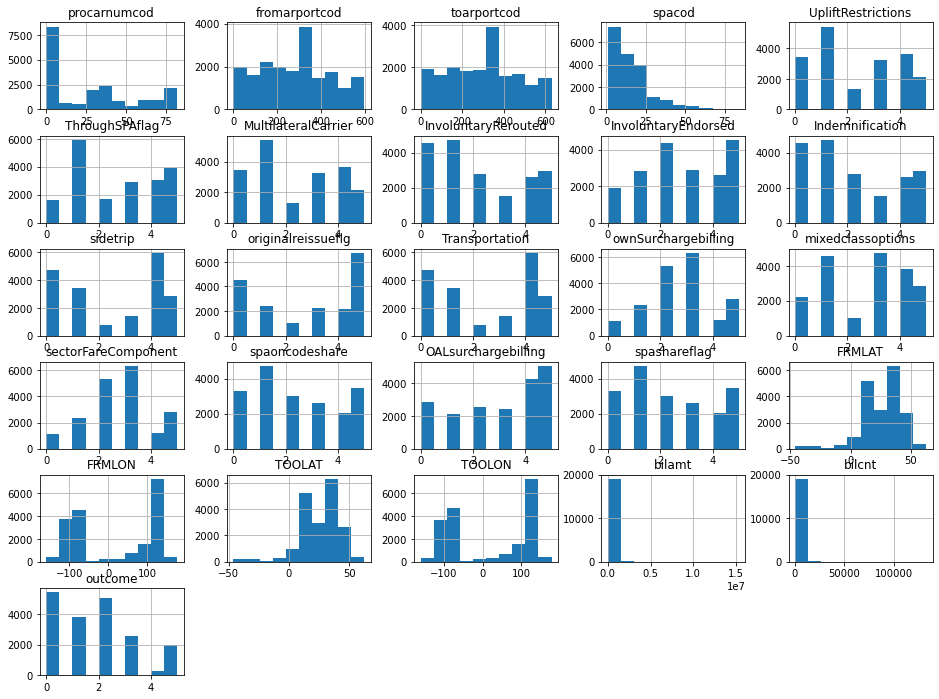

In [120]:

spa_data.hist(figsize=(16,12))

Check the correlation for each of the fields

In [121]:
spa_data.corr()

,procarnumcod,fromarportcod,toarportcod,spacod,UpliftRestrictions,ThroughSPAflag,MultilateralCarrier,InvoluntaryRerouted,InvoluntaryEndorsed,Indemnification,...,spaoncodeshare,OALsurchargebilling,spashareflag,FRMLAT,FRMLON,TOOLAT,TOOLON,bilamt,bilcnt,outcome
procarnumcod,1.000000,0.259124,0.236689,0.016610,-0.002034,0.013465,-0.002034,-0.049622,0.002650,-0.049622,...,-0.008253,0.036151,-0.008253,-0.157798,0.407467,-0.151426,0.409774,0.032093,0.037675,0.151101
fromarportcod,0.259124,1.000000,0.159227,-0.068144,0.017047,-0.010634,0.017047,-0.008126,-0.006807,-0.008126,...,0.006233,0.009051,0.006233,0.145626,-0.053930,0.104625,-0.047550,0.006101,0.016916,0.041310
toarportcod,0.236689,0.159227,1.000000,-0.064737,0.002915,0.004626,0.002915,0.000781,0.010990,0.000781,...,0.001442,0.013698,0.001442,0.124967,-0.071392,0.159895,-0.073900,-0.006882,0.010432,0.032433
spacod,0.016610,-0.068144,-0.064737,1.000000,0.005377,-0.019588,0.005377,-0.053617,0.016468,-0.053617,...,-0.008312,0.038400,-0.008312,-0.074912,0.042072,-0.067059,0.043933,0.061035,0.112153,0.095667
UpliftRestrictions,-0.002034,0.017047,0.002915,0.005377,1.000000,-0.105077,1.000000,0.179484,0.092141,0.179484,...,0.271893,0.013006,0.271893,0.005052,-0.001330,0.009221,-0.003142,0.114013,0.103269,-0.015345
ThroughSPAflag,0.013465,-0.010634,0.004626,-0.019588,-0.105077,1.000000,-0.105077,0.324840,-0.081046,0.324840,...,0.225049,-0.102726,0.225049,-0.005706,0.013035,-0.006665,0.012635,-0.111843,-0.100888,-0.082674
MultilateralCarrier,-0.002034,0.017047,0.002915,0.005377,1.000000,-0.105077,1.000000,0.179484,0.092141,0.179484,...,0.271893,0.013006,0.271893,0.005052,-0.001330,0.009221,-0.003142,0.114013,0.103269,-0.015345
InvoluntaryRerouted,-0.049622,-0.008126,0.000781,-0.053617,0.179484,0.324840,0.179484,1.000000,0.064956,1.000000,...,0.366547,-0.026781,0.366547,0.054313,-0.062537,0.046913,-0.061149,-0.144577,-0.130728,-0.337776
InvoluntaryEndorsed,0.002650,-0.006807,0.010990,0.016468,0.092141,-0.081046,0.092141,0.064956,1.000000,0.064956,...,0.074400,0.343037,0.074400,-0.003228,0.010111,-0.008325,0.007755,0.151134,0.136650,0.098483
Indemnification,-0.049622,-0.008126,0.000781,-0.053617,0.179484,0.324840,0.179484,1.000000,0.064956,1.000000,...,0.366547,-0.026781,0.366547,0.054313,-0.062537,0.046913,-0.061149,-0.144577,-0.130728,-0.337776


<AxesSubplot:>

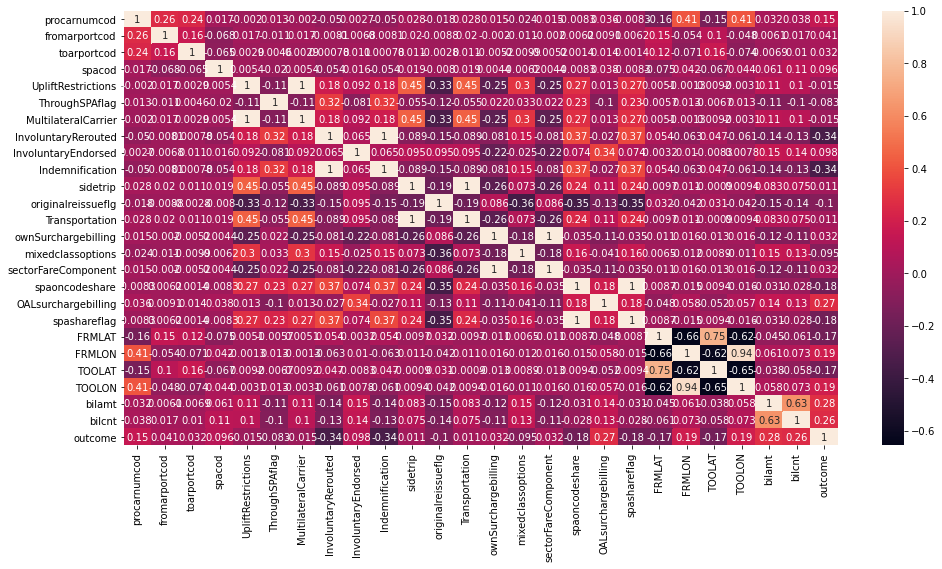

In [122]:
plt.figure(figsize=(16,8))
corr =  spa_data.corr()
sns.heatmap(spa_data.corr(), annot=True)

From the above correlation plot for the given dataset for SPA profitability, we can easily see which items are related strongly with each other and which items are related weekly with each other.


These are some relations which do not depend on each other at all. The below code selects which are highly correlated 

In [123]:
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False


selected_columns = spa_data.columns[columns]
spa_data = spa_data[selected_columns]
print(selected_columns)

Index(['procarnumcod', 'fromarportcod', 'toarportcod', 'spacod',
       'UpliftRestrictions', 'ThroughSPAflag', 'InvoluntaryRerouted',
       'InvoluntaryEndorsed', 'sidetrip', 'originalreissueflg',
       'ownSurchargebilling', 'mixedclassoptions', 'spaoncodeshare',
       'OALsurchargebilling', 'FRMLAT', 'FRMLON', 'TOOLAT', 'bilamt', 'bilcnt',
       'outcome'],
      dtype='object')


# EDA

<AxesSubplot:xlabel='outcome', ylabel='count'>

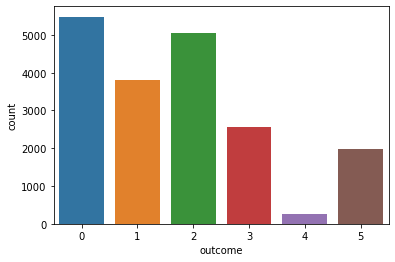

In [124]:
sns.countplot(spa_data['outcome'])

In [125]:
spa_data['outcome'].unique()

array([5, 4, 3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='count', ylabel='outcome'>

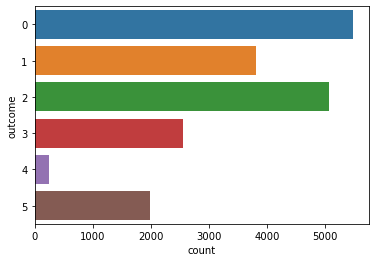

In [126]:
sns.countplot(y= 'outcome',data=spa_data)

<AxesSubplot:xlabel='outcome', ylabel='count'>

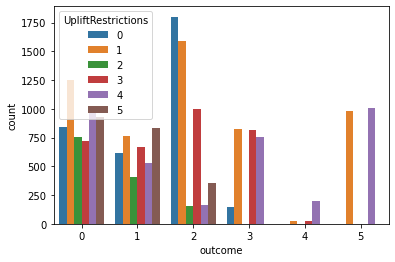

In [127]:
sns.countplot(x='outcome', hue='UpliftRestrictions',data=spa_data)

<AxesSubplot:xlabel='outcome', ylabel='ThroughSPAflag'>

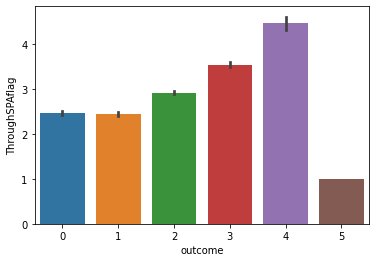

In [128]:
sns.barplot(x = 'outcome', y = 'ThroughSPAflag', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='InvoluntaryRerouted'>

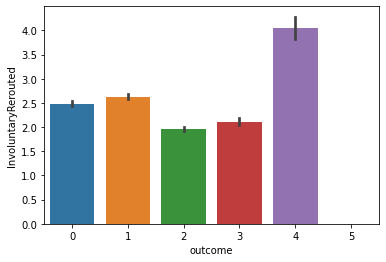

In [129]:
sns.barplot(x = 'outcome', y = 'InvoluntaryRerouted', data =  spa_data)

<AxesSubplot:xlabel='outcome', ylabel='sidetrip'>

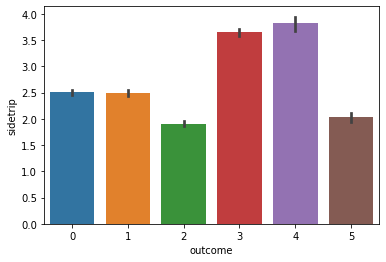

In [130]:
sns.barplot(x = 'outcome', y = 'sidetrip', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='originalreissueflg'>

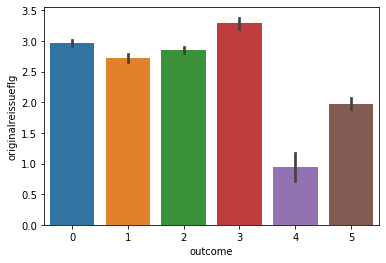

In [131]:
sns.barplot(x = 'outcome', y = 'originalreissueflg', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='spaoncodeshare'>

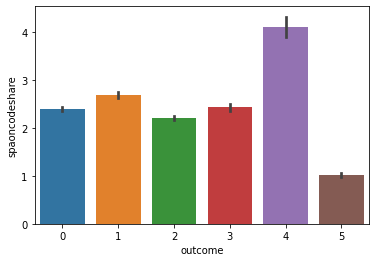

In [132]:
sns.barplot(x = 'outcome', y = 'spaoncodeshare', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='mixedclassoptions'>

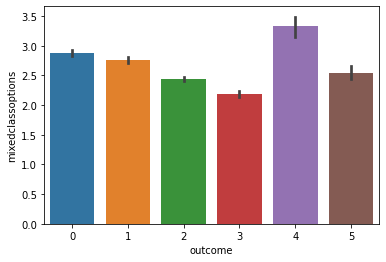

In [133]:
sns.barplot(x = 'outcome', y = 'mixedclassoptions', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='ownSurchargebilling'>

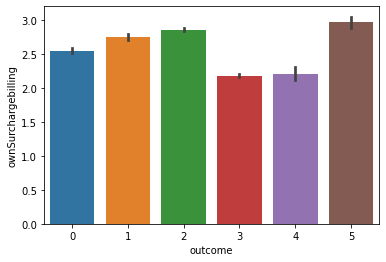

In [134]:
sns.barplot(x = 'outcome', y = 'ownSurchargebilling', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='procarnumcod'>

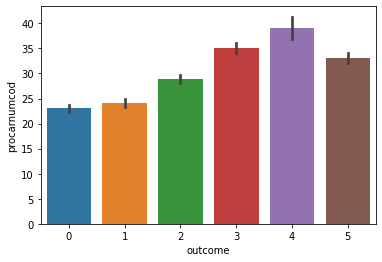

In [135]:
sns.barplot(x = 'outcome', y = 'procarnumcod', data = spa_data)

<AxesSubplot:xlabel='outcome', ylabel='spaoncodeshare'>

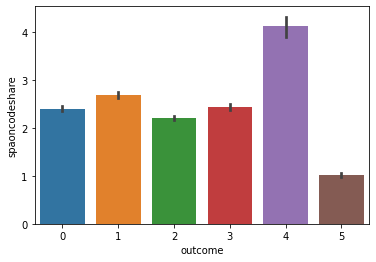

In [136]:
sns.barplot(x = 'outcome', y = 'spaoncodeshare', data = spa_data)


  1. Profitability moderately increases when we have different agreements with carriers (procarnumcod)
  2. mixed class options decreases in case of lower counts but good to have if there are lot of passenger traffic 
  3. reissue tickets increases the profitability but not good if we have high traffic. 
  4. Through SPA also increases the profitability but not good if we have high traffic. 


# Data Preproccessing

In [137]:
spa_data.isnull().sum()

procarnumcod           0
fromarportcod          0
toarportcod            0
spacod                 0
UpliftRestrictions     0
ThroughSPAflag         0
InvoluntaryRerouted    0
InvoluntaryEndorsed    0
sidetrip               0
originalreissueflg     0
ownSurchargebilling    0
mixedclassoptions      0
spaoncodeshare         0
OALsurchargebilling    0
FRMLAT                 0
FRMLON                 0
TOOLAT                 0
bilamt                 0
bilcnt                 0
outcome                0
dtype: int64

In [138]:
# though there are no nan values just for preprocessing sake 
spa_data['procarnumcod'] = spa_data['procarnumcod'].fillna(spa_data['procarnumcod'].mean())

In [139]:
spa_data_new = spa_data
spa_data_new['outcome'] = spa_data_new['outcome'].map({0 : 0, 1 : 0, 2: 1, 3: 1, 4: 3, 5: 3})

0 outcome represents the SPA Performance is Not Good.
1 outcome represents the SPA Performance is Moderately better.
2 outcome represents the SPA Performance is Good

In [140]:
spa_data_new

,procarnumcod,fromarportcod,toarportcod,spacod,UpliftRestrictions,ThroughSPAflag,InvoluntaryRerouted,InvoluntaryEndorsed,sidetrip,originalreissueflg,ownSurchargebilling,mixedclassoptions,spaoncodeshare,OALsurchargebilling,FRMLAT,FRMLON,TOOLAT,bilamt,bilcnt,outcome
0,36,355,527,42,4,1,0,5,4,0,1,5,2,5,14.508600,121.019997,9.665442,1737091.58,45717,3
1,39,215,373,3,4,1,0,5,4,0,1,5,2,5,22.308901,113.915001,14.508600,1735964.20,13901,3
2,25,355,98,14,4,1,0,5,4,0,1,5,2,5,14.508600,121.019997,-6.125570,1723632.50,9100,3
3,25,92,373,14,4,1,0,5,4,0,1,5,2,5,-6.125570,106.655998,14.508600,1715746.00,9061,3
4,1,327,308,11,4,1,0,5,4,0,1,5,2,5,28.429399,-81.308998,33.942501,1679249.97,6007,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,73,433,60,1,3,0,3,1,0,3,3,3,0,5,-31.435801,152.863007,-27.384199,62.02,1,0
19142,1,398,499,7,3,0,3,1,0,3,3,3,0,5,41.978600,-87.904800,32.446602,62.03,1,0
19143,2,100,175,8,3,0,3,1,0,3,3,3,0,5,32.898602,-80.040497,40.692501,62.04,1,0
19144,3,26,351,8,3,0,3,1,0,3,3,3,0,5,33.636700,-84.428101,41.785999,62.04,1,0


<AxesSubplot:xlabel='outcome', ylabel='count'>

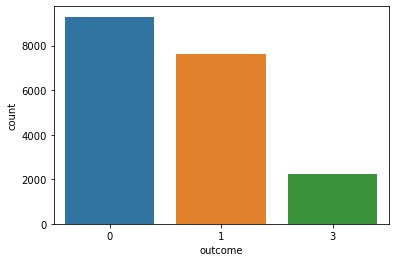

In [141]:
sns.countplot(spa_data_new['outcome'])

# Splitting Training and Testing Data

In [142]:
X = spa_data_new.iloc[:, :-1].values
y = spa_data_new.iloc[:, 19].values

In [143]:
X

array([[ 3.60000000e+01,  3.55000000e+02,  5.27000000e+02, ...,
         9.66544200e+00,  1.73709158e+06,  4.57170000e+04],
       [ 3.90000000e+01,  2.15000000e+02,  3.73000000e+02, ...,
         1.45086000e+01,  1.73596420e+06,  1.39010000e+04],
       [ 2.50000000e+01,  3.55000000e+02,  9.80000000e+01, ...,
        -6.12556982e+00,  1.72363250e+06,  9.10000000e+03],
       ...,
       [ 2.00000000e+00,  1.00000000e+02,  1.75000000e+02, ...,
         4.06925011e+01,  6.20400000e+01,  1.00000000e+00],
       [ 3.00000000e+00,  2.60000000e+01,  3.51000000e+02, ...,
         4.17859990e+01,  6.20400000e+01,  1.00000000e+00],
       [ 3.00000000e+00,  1.51000000e+02,  4.42000000e+02, ...,
         4.04915009e+01,  6.20400000e+01,  2.00000000e+00]])

In [144]:
y

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [145]:
from sklearn.model_selection import train_test_split, cross_val_score


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train

array([[7.60000000e+01, 5.93000000e+02, 3.42000000e+02, ...,
        1.85037003e+01, 5.63300000e+02, 2.00000000e+00],
       [3.00000000e+00, 3.64000000e+02, 3.45000000e+02, ...,
        2.84293995e+01, 3.43240000e+02, 2.00000000e+00],
       [5.40000000e+01, 2.15000000e+02, 3.73000000e+02, ...,
        1.45086000e+01, 6.10800000e+04, 5.89000000e+02],
       ...,
       [4.60000000e+01, 8.40000000e+01, 3.73000000e+02, ...,
        1.45086000e+01, 7.00000000e+01, 1.00000000e+00],
       [1.00000000e+00, 3.45000000e+02, 4.20000000e+02, ...,
        3.68945999e+01, 1.41620000e+03, 2.40000000e+01],
       [6.00000000e+01, 5.50000000e+01, 3.73000000e+02, ...,
        1.45086000e+01, 7.57470000e+02, 2.00000000e+00]])

In [147]:
from sklearn.preprocessing import StandardScaler


In [148]:
X_test

array([[  1.        , 469.        , 419.        , ...,  41.9786    ,
        211.        ,   4.        ],
       [  3.        , 151.        , 141.        , ...,  39.90240097,
         77.16      ,   4.        ],
       [ 76.        , 593.        , 591.        , ...,  44.88079834,
        382.68      ,  17.        ],
       ...,
       [ 58.        , 252.        , 198.        , ...,  16.90110016,
         48.        ,   1.        ],
       [ 22.        , 511.        , 234.        , ...,  22.308901  ,
        340.        ,   1.        ],
       [ 76.        , 563.        , 607.        , ...,  46.1614    ,
        875.28      ,  12.        ]])

In [149]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training Models & Prediction

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
model = LogisticRegression()

In [152]:
model.fit(X_train, y_train)

LogisticRegression()

In [153]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [154]:
print("Cross validation score :", cross_val_score(model,X, y, cv=10))

Cross validation score : [0.48041775 0.93211488 0.96710183 0.97441253 0.98955614 0.9921671
 0.96656217 0.84378265 0.66718913 0.56321839]


In [155]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [156]:
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score 0.8169712793733681
Confusion Matrix
[[1617  248    0]
 [ 422 1078    1]
 [   0   30  434]]


In [157]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1865
           1       0.79      0.72      0.75      1501
           3       1.00      0.94      0.97       464

    accuracy                           0.82      3830
   macro avg       0.86      0.84      0.85      3830
weighted avg       0.82      0.82      0.82      3830



In [158]:
from sklearn.naive_bayes import GaussianNB

In [159]:
model_nb = GaussianNB()

In [160]:
model_nb.fit(X_train,y_train)


GaussianNB()

In [161]:
y_pred_nb = model_nb.predict(X_test)
y_pred_nb

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [162]:
print("Cross validation score :", cross_val_score(model_nb,X, y, cv=10))

Cross validation score : [0.39582245 0.9926893  1.         1.         1.         0.96292428
 0.79832811 0.65987461 0.59195402 0.60083595]


In [163]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_nb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_nb))

Accuracy Score: 0.9574412532637075
Confusion Matrix
[[1840   25    0]
 [ 120 1380    1]
 [   0   17  447]]


In [164]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1865
           1       0.97      0.92      0.94      1501
           3       1.00      0.96      0.98       464

    accuracy                           0.96      3830
   macro avg       0.97      0.96      0.96      3830
weighted avg       0.96      0.96      0.96      3830



In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [167]:
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [168]:
print("Cross validation score :", cross_val_score(model_knn,X, y, cv=10))

Cross validation score : [0.29451697 0.60992167 0.78903394 0.7921671  0.72637076 0.88511749
 0.86050157 0.6985371  0.66091954 0.56112853]


In [169]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy Score: 0.8451697127937337
Confusion Matrix
[[1556  294   15]
 [ 229 1255   17]
 [  11   27  426]]


In [170]:
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1865
           1       0.80      0.84      0.82      1501
           3       0.93      0.92      0.92       464

    accuracy                           0.85      3830
   macro avg       0.86      0.86      0.86      3830
weighted avg       0.85      0.85      0.85      3830



In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
model_dt = DecisionTreeClassifier()

In [173]:
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_dt


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [174]:
print("Cross validation score :", cross_val_score(model_dt,X, y, cv=10))

Cross validation score : [0.64073107 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [175]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy Score: 0.9997389033942559
Confusion Matrix
[[1865    0    0]
 [   0 1501    0]
 [   0    1  463]]


In [176]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1865
           1       1.00      1.00      1.00      1501
           3       1.00      1.00      1.00       464

    accuracy                           1.00      3830
   macro avg       1.00      1.00      1.00      3830
weighted avg       1.00      1.00      1.00      3830



In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
x = spa_data_new['bilamt']
y = spa_data_new['outcome'] 
x

0        1737091.58
1        1735964.20
2        1723632.50
3        1715746.00
4        1679249.97
            ...    
19141         62.02
19142         62.03
19143         62.04
19144         62.04
19145         62.04
Name: bilamt, Length: 19146, dtype: float64

In [179]:
x_train_lg, x_test_lg, y_train_lg, y_test_lg = train_test_split(x, y)
x_train_lg.shape

(14359,)

In [180]:
y_train_lg.shape

(14359,)

In [181]:
regressor = LinearRegression()
regressor.fit(x_train_lg.values.reshape(1,-1), y_train_lg.values.reshape(1,-1))
print(regressor.coef_)
print(regressor.intercept_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[3. 0. 0. ... 0. 1. 1.]


In [182]:
predictions = regressor.predict(x_train_lg.values.reshape(1,-1))
predictions

array([[3., 0., 0., ..., 0., 1., 1.]])

In [183]:

import statsmodels.api as sm

In [184]:
x2 = sm.add_constant(x)

In [185]:
est = sm.OLS(y, x2)

In [186]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2031.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:58:38   Log-Likelihood:                -25088.
No. Observations:               19146   AIC:                         5.018e+04
Df Residuals:                   19144   BIC:                         5.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7080      0.007    108.152      0.0

In [187]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [188]:
from sklearn.multiclass import OneVsRestClassifier

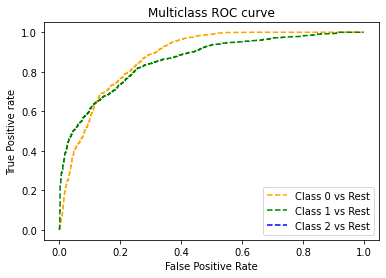

In [189]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

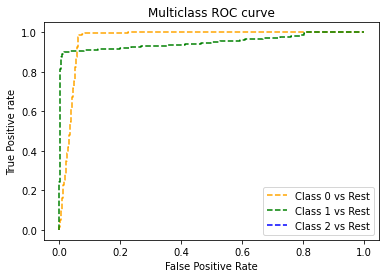

In [190]:
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

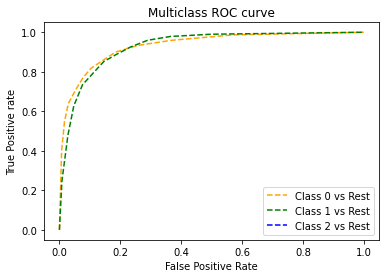

In [191]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

From the above Prediction models we can conclude that Decision Tree classifier is the best model as the Accuracy is maximum. Followed by Knn Classifier.

# Hypothesis Testing

We have take the bilamt and outcome as the attributes for Hypothesis testing as bilamt changes performance of SPA also changes.

Our hypothesis is that  " There is no significance difference in bilamt when outcome of SPA changes from 1 to 3 ".
Alternate hypothesis is that " There is significance difference in bilamt when outcome of SPA changes from 1 to 3 ".

We calculate the mean diffence of bilamt of SPA 1 with 3. We the sample the dataset and find the mean difference.We run for 5000 situmulation and find the p value and observerd diffence , which tell whether we need to reject null hypothesis or not.

In [192]:
spa_data

,procarnumcod,fromarportcod,toarportcod,spacod,UpliftRestrictions,ThroughSPAflag,InvoluntaryRerouted,InvoluntaryEndorsed,sidetrip,originalreissueflg,ownSurchargebilling,mixedclassoptions,spaoncodeshare,OALsurchargebilling,FRMLAT,FRMLON,TOOLAT,bilamt,bilcnt,outcome
0,36,355,527,42,4,1,0,5,4,0,1,5,2,5,14.508600,121.019997,9.665442,1737091.58,45717,3
1,39,215,373,3,4,1,0,5,4,0,1,5,2,5,22.308901,113.915001,14.508600,1735964.20,13901,3
2,25,355,98,14,4,1,0,5,4,0,1,5,2,5,14.508600,121.019997,-6.125570,1723632.50,9100,3
3,25,92,373,14,4,1,0,5,4,0,1,5,2,5,-6.125570,106.655998,14.508600,1715746.00,9061,3
4,1,327,308,11,4,1,0,5,4,0,1,5,2,5,28.429399,-81.308998,33.942501,1679249.97,6007,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,73,433,60,1,3,0,3,1,0,3,3,3,0,5,-31.435801,152.863007,-27.384199,62.02,1,0
19142,1,398,499,7,3,0,3,1,0,3,3,3,0,5,41.978600,-87.904800,32.446602,62.03,1,0
19143,2,100,175,8,3,0,3,1,0,3,3,3,0,5,32.898602,-80.040497,40.692501,62.04,1,0
19144,3,26,351,8,3,0,3,1,0,3,3,3,0,5,33.636700,-84.428101,41.785999,62.04,1,0


In [193]:
spa_bilamt_outcome = spa_data [ (spa_data['outcome']==1) | (spa_data['outcome']==3)]
spa_bilamt_outcome = spa_bilamt_outcome[['bilamt','outcome']]
spa_bilamt_outcome

,bilamt,outcome
0,1737091.58,3
1,1735964.20,3
2,1723632.50,3
3,1715746.00,3
4,1679249.97,3
...,...,...
18582,163.34,1
18597,164.59,1
18661,232.74,1
18662,232.84,1


In [194]:
bilamt_1 = spa_bilamt_outcome['bilamt'] [spa_bilamt_outcome['outcome'] == 1]
bilamt_1

1742     43930.00
1743     43901.91
1744     43896.82
1745     43888.69
1749     43652.63
           ...   
18582      163.34
18597      164.59
18661      232.74
18662      232.84
19019      209.99
Name: bilamt, Length: 7613, dtype: float64

In [195]:
bilamt_3 = spa_bilamt_outcome['bilamt'] [spa_bilamt_outcome['outcome'] == 3]
bilamt_3

0       1737091.58
1       1735964.20
2       1723632.50
3       1715746.00
4       1679249.97
           ...    
4645       8611.82
4726       9977.25
4730       9943.27
9319         15.77
9324         16.35
Name: bilamt, Length: 2240, dtype: float64

In [196]:
means_outcome = spa_bilamt_outcome.groupby('outcome').mean()
means_outcome

,bilamt
outcome,
1,7572.034395
3,348298.062393


In [197]:
def mean_difference(df, by ,attribute):
    means_table = df.groupby(by).mean()
    return (means_table[attribute].iloc[0]- means_table[attribute].iloc[1])

In [198]:
observed_difference =  mean_difference(spa_bilamt_outcome, 'outcome' ,'bilamt')
observed_difference

-340726.0279977441

In [199]:
spa_bilamt_outcome

,bilamt,outcome
0,1737091.58,3
1,1735964.20,3
2,1723632.50,3
3,1715746.00,3
4,1679249.97,3
...,...,...
18582,163.34,1
18597,164.59,1
18661,232.74,1
18662,232.84,1


In [200]:
shuff = spa_bilamt_outcome.sample(9853 ,replace = False)
shuff

,bilamt,outcome
9148,1261.93,1
6309,3089.00,1
1833,40560.00,1
1344,65326.66,3
4598,8872.50,1
...,...,...
4523,7028.26,1
12643,311.52,1
4441,7290.00,1
11242,754.36,1


In [201]:
original_and_shuffled= spa_bilamt_outcome.assign(shuffled_bilamt=shuff['bilamt'].values)
original_and_shuffled

,bilamt,outcome,shuffled_bilamt
0,1737091.58,3,1261.93
1,1735964.20,3,3089.00
2,1723632.50,3,40560.00
3,1715746.00,3,65326.66
4,1679249.97,3,8872.50
...,...,...,...
18582,163.34,1,7028.26
18597,164.59,1,311.52
18661,232.74,1,7290.00
18662,232.84,1,754.36


In [202]:
mean_difference(original_and_shuffled, 'outcome' ,'shuffled_bilamt')

8929.75287677269

Situmalation for 5000 permutations

In [203]:
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    shuffled = spa_bilamt_outcome.sample(9853,replace = False)
    original_and_shuffled = spa_bilamt_outcome.assign(shuffled_bilamt=shuffled['outcome'].values )
    difference = mean_difference(original_and_shuffled, 'outcome' ,'shuffled_bilamt')
    differences[i] = difference
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.011840
1,-0.004338
2,-0.021672
3,-0.017049
4,0.006062
...,...
4995,0.001440
4996,-0.014738
4997,-0.000871
4998,0.017618


Observed Difference: -340726.0279977441


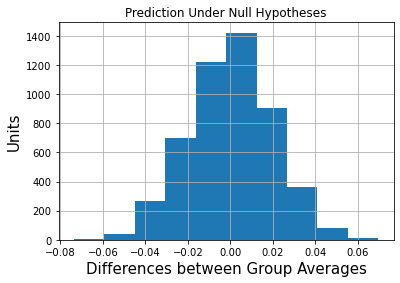

In [204]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

In [205]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0

Observed Difference: -340726.0279977441


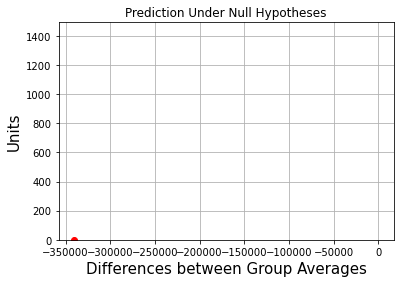

In [206]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, 0, color='red');
print('Observed Difference:', observed_difference)

The observed difference  is about -340726 which doesn't appear on the horizontal scale of the histogram.Therefore Null Hypothesis is inconsistent.

So we reject Null Hypothesis. Alternate hypothesis is accepted. There is significance difference in bilamt when outcome of SPA changes from 1 to 3

In [2]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all"></form>''')

#z-test 



Null Hypothesis: There is no difference in the mean of BILL COUNT for the given value of 412
Alternate Hypothesis: Actual Mean and given Mean (412) are different

In [100]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest, pval = stests.ztest(spa_data['bilcnt'], x2=None, value=412)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis - There is no difference in the mean of BILL COUNT for the given value of 412")

0.9998490738526473
accept null hypothesis - There is no difference in the mean of BILL COUNT for the given value of 412


#z test 

Sample 1 is 25% of the data and Sample 2 is 50% of the data

H0: mean of two samples is the same

H1: mean of two samples is not the same

In [111]:
spa25 = spa_data.sample(frac =.25)
spa50 = spa_data.sample(frac =.50)
ztest ,pval1 = stests.ztest(spa25['bilcnt'], x2=spa50['bilcnt'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.17858255899482156
accept null hypothesis
